## Extract the label and other information from the pictures

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn-whitegrid')
import seaborn as sns

In [2]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, Dataset

In [3]:
import os
import pickle
from PIL import Image
import numpy as np

## Load the Curriculum Model (5 epochs)

## Curriculum Model

In [4]:
# Load the curriculum model
curriculum_model = torch.load("Curriculum_Model_Result.pt")
print(curriculum_model)

{'train_loss': [2.562445257106671, 2.3150001946573737, 2.0196182282825386, 1.8360477189427022, 1.6889658671641006, 1.5096054552045057, 1.288378677644267, 1.1530875679289276, 1.0310961472273013, 0.9312976197399306, 0.8573973328976373, 0.860345725178507], 'train_acc': [tensor(11.2279, device='cuda:0'), tensor(14.2225, device='cuda:0'), tensor(22.6361, device='cuda:0'), tensor(26.6393, device='cuda:0'), tensor(32.2339, device='cuda:0'), tensor(40.8251, device='cuda:0'), tensor(49.6088, device='cuda:0'), tensor(55.9049, device='cuda:0'), tensor(60.9241, device='cuda:0'), tensor(65.0160, device='cuda:0'), tensor(67.8652, device='cuda:0'), tensor(68.2377, device='cuda:0')], 'val_loss': [2.5711802074432373, 2.2806740856170653, 2.493659920501709, 2.0210288694381715, 2.036427952194214, 1.8305484436035155, 1.7093245071411134, 1.571398875427246, 1.4518282308578492, 1.3511315853118897, 1.2453661266326905, 1.236800625896454], 'val_acc': [tensor(12.2600, device='cuda:0'), tensor(13.6600, device='cud

### Training Loss and Accuracy (CIFAR10)

In [5]:
# Record the each value in the history dictionary 
curriculum_train_loss = curriculum_model["train_loss"]
curriculum_train_acc = curriculum_model["train_acc"]
curriculum_valid_loss = curriculum_model["val_loss"]
curriculum_valid_acc = curriculum_model["val_acc"]

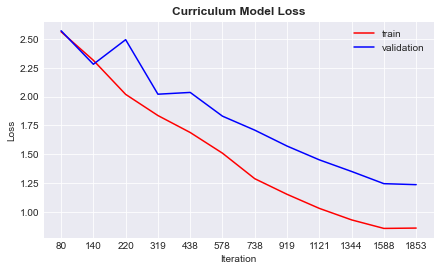

In [6]:
# Plot the loss result
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (7, 4))
plt.title("Curriculum Model Loss", fontweight = "bold")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [80, 140, 220, 319, 438, 578, 738, 919, 1121, 1344, 1588, 1853])
plt.plot(curriculum_train_loss, "r-", label = "train")
plt.plot(curriculum_valid_loss, "b-", label = "validation")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

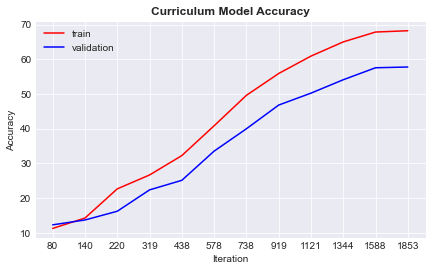

In [7]:
# Plot the accuracy result
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (7, 4))
plt.title("Curriculum Model Accuracy", fontweight = "bold")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [80, 140, 220, 319, 438, 578, 738, 919, 1121, 1344, 1588, 1853])
plt.plot(curriculum_train_acc, "r-", label = "train")
plt.plot(curriculum_valid_acc, "b-", label = "validation")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [8]:
# Calculate the average test accuracy
curriculum_valid_acc = torch.stack(curriculum_model["val_acc"])
print(torch.max(curriculum_valid_acc))

curriculum_test_acc = torch.stack(curriculum_model["test_acc"])
print(torch.max(curriculum_test_acc))

curriculum_top1_mean_acc = torch.mean(curriculum_test_acc)
print(curriculum_top1_mean_acc)

tensor(57.7800, device='cuda:0')
tensor(58.3300, device='cuda:0')
tensor(37.0833, device='cuda:0')


### CIFAR10 Test Accuracy (57.81%) (Each Label 1000 images)

In [82]:
CIFAR10_confusion_matrix = np.load("Curriculum_CIFAR10_Confusion_Matrix.npy")

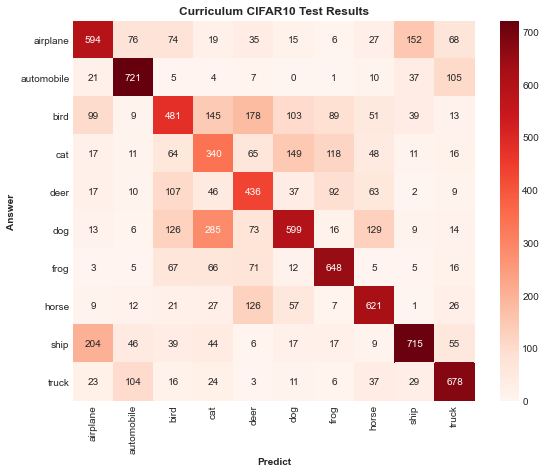

In [85]:
import seaborn as sn

# Change confusion matrix type to pd dataframe
CIFAR10_confusion_matrix = pd.DataFrame(CIFAR10_confusion_matrix)

label = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
chart_label = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Plot the CIFAR10 heatmap confusion matrix 
ax = plt.subplots(figsize = (9, 7)) 
ax = plt.axes()
sn.heatmap(CIFAR10_confusion_matrix, ax = ax, annot = True, cmap = "Reds", fmt = "g")


ax.set_xticklabels(chart_label, rotation = 90)
ax.set_yticklabels(label, rotation = 360)

ax.set_title("Curriculum CIFAR10 Test Results", fontweight = "bold")
plt.xlabel("Predict", fontweight = "bold")
plt.ylabel("Answer", fontweight = "bold")

plt.show()

In [11]:
# Calculate the probability of each labels
CIFAR10_confusion_matrix_probability = np.true_divide(CIFAR10_confusion_matrix, 1000)
print(CIFAR10_confusion_matrix_probability)

       0      1      2      3      4      5      6      7      8      9
0  0.594  0.076  0.074  0.019  0.035  0.015  0.006  0.027  0.152  0.068
1  0.021  0.721  0.005  0.004  0.007  0.000  0.001  0.010  0.037  0.105
2  0.099  0.009  0.481  0.145  0.178  0.103  0.089  0.051  0.039  0.013
3  0.017  0.011  0.064  0.340  0.065  0.149  0.118  0.048  0.011  0.016
4  0.017  0.010  0.107  0.046  0.436  0.037  0.092  0.063  0.002  0.009
5  0.013  0.006  0.126  0.285  0.073  0.599  0.016  0.129  0.009  0.014
6  0.003  0.005  0.067  0.066  0.071  0.012  0.648  0.005  0.005  0.016
7  0.009  0.012  0.021  0.027  0.126  0.057  0.007  0.621  0.001  0.026
8  0.204  0.046  0.039  0.044  0.006  0.017  0.017  0.009  0.715  0.055
9  0.023  0.104  0.016  0.024  0.003  0.011  0.006  0.037  0.029  0.678


In [12]:
CIFAR10_confusion_matrix_pd_type = np.array(CIFAR10_confusion_matrix_probability)

CIFAR10_confusion_matrix_pd_type = pd.DataFrame(CIFAR10_confusion_matrix_pd_type,
                                                    index = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"],
                                                    columns = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])
print(CIFAR10_confusion_matrix_pd_type.head(10))

            airplane  automobile   bird    cat   deer    dog   frog  horse  \
airplane       0.594       0.076  0.074  0.019  0.035  0.015  0.006  0.027   
automobile     0.021       0.721  0.005  0.004  0.007  0.000  0.001  0.010   
bird           0.099       0.009  0.481  0.145  0.178  0.103  0.089  0.051   
cat            0.017       0.011  0.064  0.340  0.065  0.149  0.118  0.048   
deer           0.017       0.010  0.107  0.046  0.436  0.037  0.092  0.063   
dog            0.013       0.006  0.126  0.285  0.073  0.599  0.016  0.129   
frog           0.003       0.005  0.067  0.066  0.071  0.012  0.648  0.005   
horse          0.009       0.012  0.021  0.027  0.126  0.057  0.007  0.621   
ship           0.204       0.046  0.039  0.044  0.006  0.017  0.017  0.009   
truck          0.023       0.104  0.016  0.024  0.003  0.011  0.006  0.037   

             ship  truck  
airplane    0.152  0.068  
automobile  0.037  0.105  
bird        0.039  0.013  
cat         0.011  0.016  
deer  

In [13]:
# Select each column
# airplane: 0
# automobile : 1
# bird : 2
# cat : 3
# deer : 4
# dog : 5
# frog : 6
# horse : 7
# ship : 8
# truck : 9
airplane = CIFAR10_confusion_matrix_pd_type["airplane"]
automobile = CIFAR10_confusion_matrix_pd_type["automobile"]
bird  = CIFAR10_confusion_matrix_pd_type["bird"]
cat = CIFAR10_confusion_matrix_pd_type["cat"]
deer = CIFAR10_confusion_matrix_pd_type["deer"]
dog = CIFAR10_confusion_matrix_pd_type["dog"]
frog = CIFAR10_confusion_matrix_pd_type["frog"]
horse = CIFAR10_confusion_matrix_pd_type["horse"]
ship = CIFAR10_confusion_matrix_pd_type["ship"]
truck = CIFAR10_confusion_matrix_pd_type["truck"]

### Label 0 -> airplane

In [14]:
airplane.head(10)

airplane      0.594
automobile    0.021
bird          0.099
cat           0.017
deer          0.017
dog           0.013
frog          0.003
horse         0.009
ship          0.204
truck         0.023
Name: airplane, dtype: float64

0.594 0.003


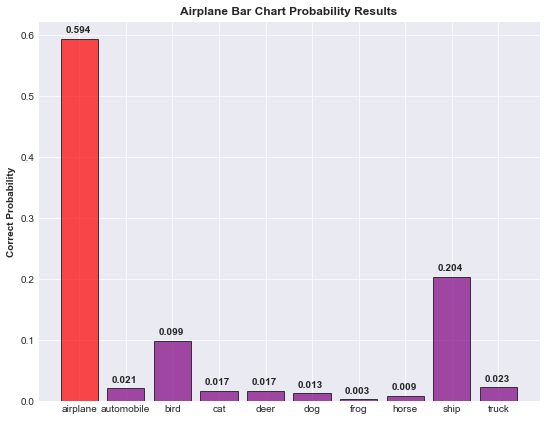

In [15]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
airplane_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
airplane_pro = [0.594, 0.021, 0.099, 0.017, 0.017, 0.013, 0.003, 0.009, 0.204, 0.023]

airplane_largest = np.max(np.array(airplane_pro))
airplane_smallest = np.min(np.array(airplane_pro))
print(airplane_largest, airplane_smallest)

airplane_color = ["red", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(airplane_label)), airplane_pro, align = "center", color = airplane_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(airplane_label)), airplane_label)

for element, v in enumerate(airplane_pro):
    plt.text(np.arange(len(airplane_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Airplane Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 1 -> automobile

In [16]:
automobile.head(10)

airplane      0.076
automobile    0.721
bird          0.009
cat           0.011
deer          0.010
dog           0.006
frog          0.005
horse         0.012
ship          0.046
truck         0.104
Name: automobile, dtype: float64

0.721 0.005


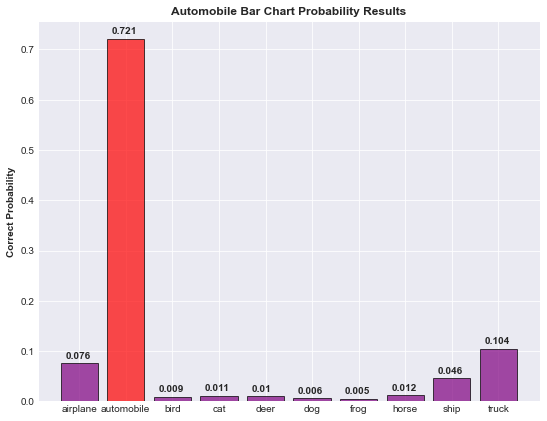

In [17]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
automobile_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
automobile_pro = [0.076, 0.721, 0.009, 0.011, 0.010, 0.006, 0.005, 0.012, 0.046, 0.104]

automobile_largest = np.max(np.array(automobile_pro))
automobile_smallest = np.min(np.array(automobile_pro))
print(automobile_largest, automobile_smallest)

automobile_color = ["purple", "red", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(automobile_label)), automobile_pro, align = "center", color = automobile_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(automobile_label)), automobile_label)

for element, v in enumerate(automobile_pro):
    plt.text(np.arange(len(automobile_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Automobile Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 2 -> bird

In [18]:
bird.head(10)

airplane      0.074
automobile    0.005
bird          0.481
cat           0.064
deer          0.107
dog           0.126
frog          0.067
horse         0.021
ship          0.039
truck         0.016
Name: bird, dtype: float64

0.481 0.005


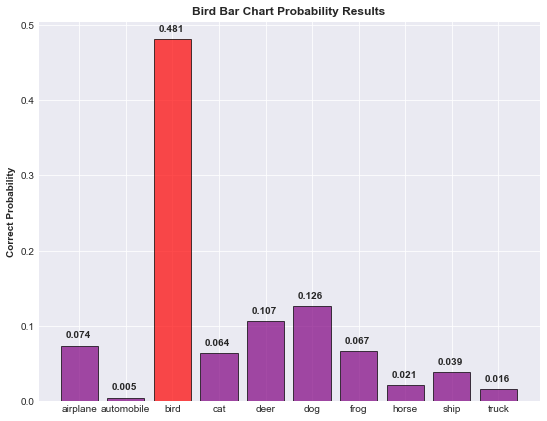

In [19]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
bird_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
bird_pro = [0.074, 0.005, 0.481, 0.064, 0.107, 0.126, 0.067, 0.021, 0.039, 0.016]

bird_largest = np.max(np.array(bird_pro))
bird_smallest = np.min(np.array(bird_pro))
print(bird_largest, bird_smallest)

bird_color = ["purple", "purple", "red", "purple", "purple", "purple", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(bird_label)), bird_pro, align = "center", color = bird_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(bird_label)), bird_label)

for element, v in enumerate(bird_pro):
    plt.text(np.arange(len(bird_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Bird Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 3 -> cat

In [20]:
cat.head(10)

airplane      0.019
automobile    0.004
bird          0.145
cat           0.340
deer          0.046
dog           0.285
frog          0.066
horse         0.027
ship          0.044
truck         0.024
Name: cat, dtype: float64

0.34 0.004


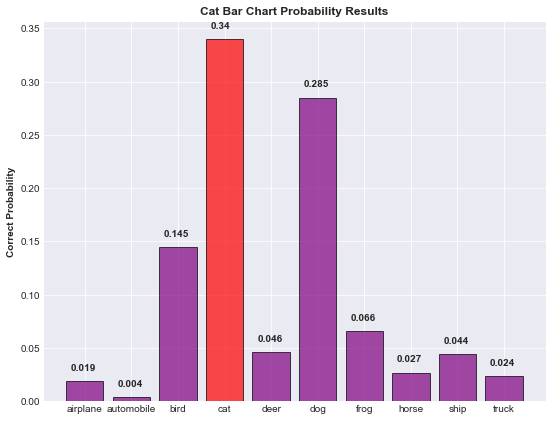

In [21]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
cat_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
cat_pro = [0.019, 0.004, 0.145, 0.340, 0.046, 0.285, 0.066, 0.027, 0.044, 0.024]

cat_largest = np.max(np.array(cat_pro))
cat_smallest = np.min(np.array(cat_pro))
print(cat_largest, cat_smallest)

cat_color = ["purple", "purple", "purple", "red", "purple", "purple", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(cat_label)), cat_pro, align = "center", color = cat_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(cat_label)), cat_label)

for element, v in enumerate(cat_pro):
    plt.text(np.arange(len(cat_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Cat Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 4 -> deer

In [22]:
deer.head(10)

airplane      0.035
automobile    0.007
bird          0.178
cat           0.065
deer          0.436
dog           0.073
frog          0.071
horse         0.126
ship          0.006
truck         0.003
Name: deer, dtype: float64

0.436 0.003


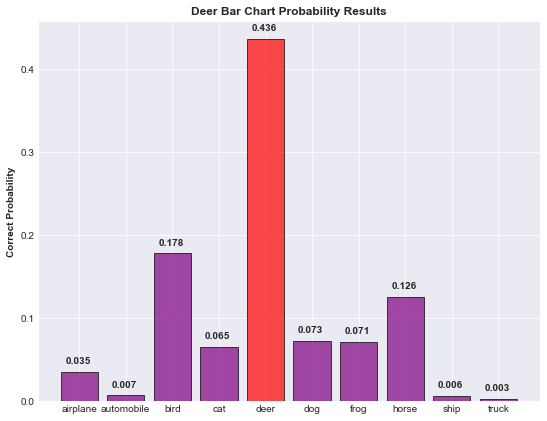

In [23]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
deer_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
deer_pro = [0.035, 0.007, 0.178, 0.065, 0.436, 0.073, 0.071, 0.126, 0.006, 0.003]

deer_largest = np.max(np.array(deer_pro))
deer_smallest = np.min(np.array(deer_pro))
print(deer_largest, deer_smallest)

deer_color = ["purple", "purple", "purple", "purple", "red", "purple", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(deer_label)), deer_pro, align = "center", color = deer_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(deer_label)), deer_label)

for element, v in enumerate(deer_pro):
    plt.text(np.arange(len(deer_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Deer Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 5 -> dog

In [24]:
dog.head(10)

airplane      0.015
automobile    0.000
bird          0.103
cat           0.149
deer          0.037
dog           0.599
frog          0.012
horse         0.057
ship          0.017
truck         0.011
Name: dog, dtype: float64

0.599 0.0


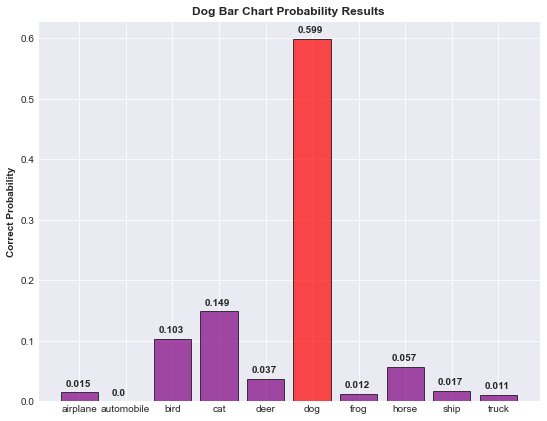

In [25]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
dog_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
dog_pro = [0.015, 0.000, 0.103, 0.149, 0.037, 0.599, 0.012, 0.057, 0.017, 0.011]

dog_largest = np.max(np.array(dog_pro))
dog_smallest = np.min(np.array(dog_pro))
print(dog_largest, dog_smallest)

dog_color = ["purple", "purple", "purple", "purple", "purple", "red", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(dog_label)), dog_pro, align = "center", color = dog_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(dog_label)), dog_label)

for element, v in enumerate(dog_pro):
    plt.text(np.arange(len(dog_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Dog Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 6 -> frog

In [26]:
frog.head(10)

airplane      0.006
automobile    0.001
bird          0.089
cat           0.118
deer          0.092
dog           0.016
frog          0.648
horse         0.007
ship          0.017
truck         0.006
Name: frog, dtype: float64

0.648 0.001


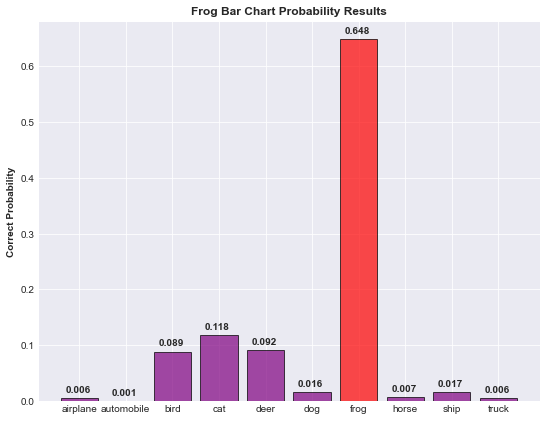

In [27]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
frog_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
frog_pro = [0.006, 0.001, 0.089, 0.118, 0.092, 0.016, 0.648, 0.007, 0.017, 0.006]

frog_largest = np.max(np.array(frog_pro))
frog_smallest = np.min(np.array(frog_pro))
print(frog_largest, frog_smallest)

frog_color = ["purple", "purple", "purple", "purple", "purple", "purple", "red", "purple", "purple", "purple"]

plt.bar(np.arange(len(frog_label)), frog_pro, align = "center", color = frog_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(frog_label)), frog_label)

for element, v in enumerate(frog_pro):
    plt.text(np.arange(len(frog_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Frog Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 7 -> horse

In [28]:
horse.head(10)

airplane      0.027
automobile    0.010
bird          0.051
cat           0.048
deer          0.063
dog           0.129
frog          0.005
horse         0.621
ship          0.009
truck         0.037
Name: horse, dtype: float64

0.621 0.005


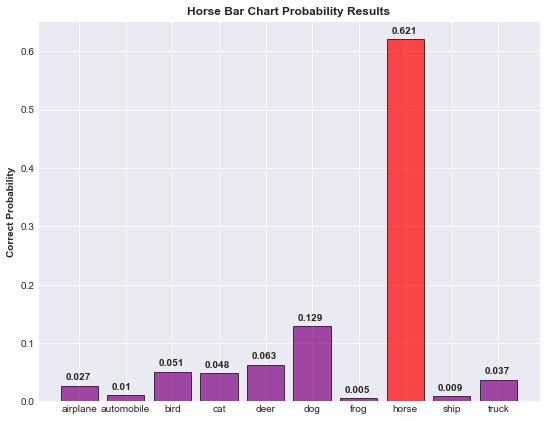

In [29]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
horse_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
horse_pro = [0.027, 0.010, 0.051, 0.048, 0.063, 0.129, 0.005, 0.621, 0.009, 0.037]

horse_largest = np.max(np.array(horse_pro))
horse_smallest = np.min(np.array(horse_pro))
print(horse_largest, horse_smallest)

horse_color = ["purple", "purple", "purple", "purple", "purple", "purple", "purple", "red", "purple", "purple"]

plt.bar(np.arange(len(horse_label)), horse_pro, align = "center", color = horse_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(horse_label)), horse_label)

for element, v in enumerate(horse_pro):
    plt.text(np.arange(len(horse_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Horse Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 8 -> ship

In [30]:
ship.head(10)

airplane      0.152
automobile    0.037
bird          0.039
cat           0.011
deer          0.002
dog           0.009
frog          0.005
horse         0.001
ship          0.715
truck         0.029
Name: ship, dtype: float64

0.715 0.001


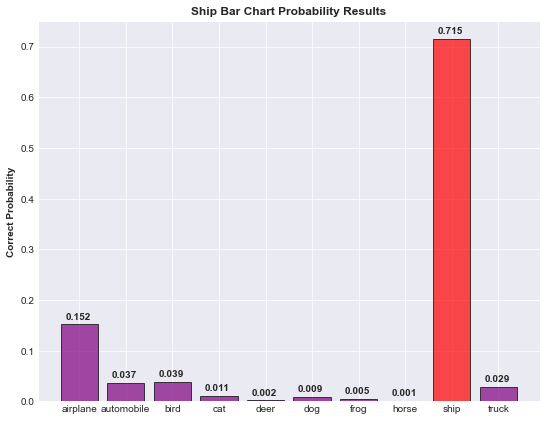

In [31]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
ship_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
ship_pro = [0.152, 0.037, 0.039, 0.011, 0.002, 0.009, 0.005, 0.001, 0.715, 0.029]

ship_largest = np.max(np.array(ship_pro))
ship_smallest = np.min(np.array(ship_pro))
print(ship_largest, ship_smallest)

ship_color = ["purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "red", "purple"]

plt.bar(np.arange(len(ship_label)), ship_pro, align = "center", color = ship_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(ship_label)), ship_label)

for element, v in enumerate(ship_pro):
    plt.text(np.arange(len(ship_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Ship Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 9 -> truck

In [32]:
truck.head(10)

airplane      0.068
automobile    0.105
bird          0.013
cat           0.016
deer          0.009
dog           0.014
frog          0.016
horse         0.026
ship          0.055
truck         0.678
Name: truck, dtype: float64

0.678 0.009


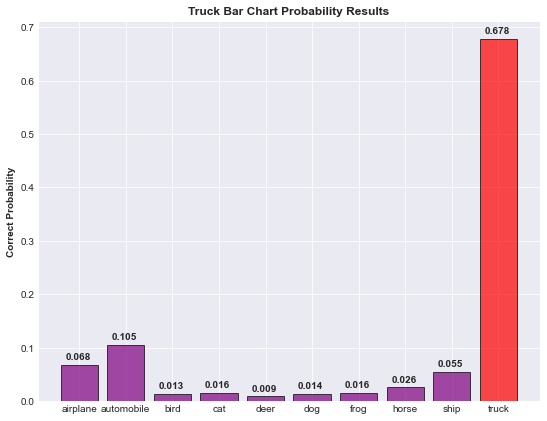

In [33]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
truck_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
truck_pro = [0.068, 0.105, 0.013, 0.016, 0.009, 0.014, 0.016, 0.026, 0.055, 0.678]

truck_largest = np.max(np.array(truck_pro))
truck_smallest = np.min(np.array(truck_pro))
print(truck_largest, truck_smallest)

truck_color = ["purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "red"]

plt.bar(np.arange(len(truck_label)), truck_pro, align = "center", color = truck_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(truck_label)), truck_label)

for element, v in enumerate(truck_pro):
    plt.text(np.arange(len(truck_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Truck Bar Chart Probability Results", fontweight = "bold")
plt.show()

### CIFAR100 Test Accuracy (32.81%) (Each Label 100 images)

In [34]:
CIFAR100_confusion_matrix = np.load("Curriculum_CIFAR100_Confusion_Matrix.npy")

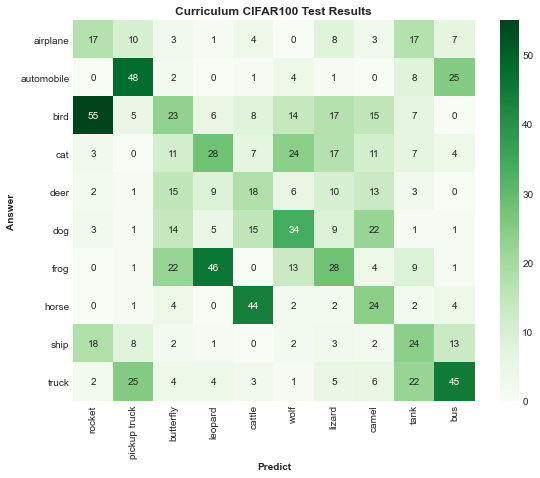

In [87]:
import seaborn as sn

# Change confusion matrix type to pd dataframe
CIFAR100_confusion_matrix = pd.DataFrame(CIFAR100_confusion_matrix)

label = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
chart_label = ["rocket", "pickup truck", "butterfly", "leopard", "cattle", "wolf", "lizard", "camel", "tank", "bus"]

# Plot the CIFAR100 heatmap confusion matrix 
ax = plt.subplots(figsize = (9, 7)) 
ax = plt.axes()
sn.heatmap(CIFAR100_confusion_matrix, ax = ax, annot = True, cmap = "Greens", fmt = "g")

ax.set_xticklabels(chart_label, rotation = 90)
ax.set_yticklabels(label, rotation = 360)

ax.set_title("Curriculum CIFAR100 Test Results", fontweight = "bold")
plt.xlabel("Predict", fontweight = "bold")
plt.ylabel("Answer", fontweight = "bold")

plt.show()

In [36]:
# Calculate the probability of each labels
CIFAR100_confusion_matrix_probability = np.true_divide(CIFAR100_confusion_matrix, 100)
print(CIFAR100_confusion_matrix_probability)

      0     1     2     3     4     5     6     7     8     9
0  0.17  0.10  0.03  0.01  0.04  0.00  0.08  0.03  0.17  0.07
1  0.00  0.48  0.02  0.00  0.01  0.04  0.01  0.00  0.08  0.25
2  0.55  0.05  0.23  0.06  0.08  0.14  0.17  0.15  0.07  0.00
3  0.03  0.00  0.11  0.28  0.07  0.24  0.17  0.11  0.07  0.04
4  0.02  0.01  0.15  0.09  0.18  0.06  0.10  0.13  0.03  0.00
5  0.03  0.01  0.14  0.05  0.15  0.34  0.09  0.22  0.01  0.01
6  0.00  0.01  0.22  0.46  0.00  0.13  0.28  0.04  0.09  0.01
7  0.00  0.01  0.04  0.00  0.44  0.02  0.02  0.24  0.02  0.04
8  0.18  0.08  0.02  0.01  0.00  0.02  0.03  0.02  0.24  0.13
9  0.02  0.25  0.04  0.04  0.03  0.01  0.05  0.06  0.22  0.45


In [37]:
CIFAR100_confusion_matrix_pd_type = np.array(CIFAR100_confusion_matrix_probability)

CIFAR100_confusion_matrix_pd_type = pd.DataFrame(CIFAR100_confusion_matrix_pd_type,
                                                    index = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"],
                                                    columns = ["rocket", "pickup truck", "butterfly", "leopard", "cattle", "wolf", "lizard", "camel", "tank", "bus"])
print(CIFAR100_confusion_matrix_pd_type.head(10))

            rocket  pickup truck  butterfly  leopard  cattle  wolf  lizard  \
airplane      0.17          0.10       0.03     0.01    0.04  0.00    0.08   
automobile    0.00          0.48       0.02     0.00    0.01  0.04    0.01   
bird          0.55          0.05       0.23     0.06    0.08  0.14    0.17   
cat           0.03          0.00       0.11     0.28    0.07  0.24    0.17   
deer          0.02          0.01       0.15     0.09    0.18  0.06    0.10   
dog           0.03          0.01       0.14     0.05    0.15  0.34    0.09   
frog          0.00          0.01       0.22     0.46    0.00  0.13    0.28   
horse         0.00          0.01       0.04     0.00    0.44  0.02    0.02   
ship          0.18          0.08       0.02     0.01    0.00  0.02    0.03   
truck         0.02          0.25       0.04     0.04    0.03  0.01    0.05   

            camel  tank   bus  
airplane     0.03  0.17  0.07  
automobile   0.00  0.08  0.25  
bird         0.15  0.07  0.00  
cat          

In [38]:
# Select each column
# rocket: 69 -> 0
# pickup truck : 58 -> 1
# butterfly : 14 -> 2
# leopard : 42 -> 3
# cattle : 19 -> 4
# wolf : 97 -> 5
# lizard : 44 -> 6
# camel : 15 -> 7
# tank : 85 -> 8
# bus : 13 -> 9
rocket = CIFAR100_confusion_matrix_pd_type["rocket"]
pickup_truck = CIFAR100_confusion_matrix_pd_type["pickup truck"]
butterfly  = CIFAR100_confusion_matrix_pd_type["butterfly"]
leopard = CIFAR100_confusion_matrix_pd_type["leopard"]
cattle = CIFAR100_confusion_matrix_pd_type["cattle"]
wolf = CIFAR100_confusion_matrix_pd_type["wolf"]
lizard = CIFAR100_confusion_matrix_pd_type["lizard"]
camel = CIFAR100_confusion_matrix_pd_type["camel"]
tank = CIFAR100_confusion_matrix_pd_type["tank"]
bus = CIFAR100_confusion_matrix_pd_type["bus"]

### Correct Label -> Red Color, Wrong Label -> Green Color

### Label 0 -> rocket

In [39]:
rocket.head(10)

airplane      0.17
automobile    0.00
bird          0.55
cat           0.03
deer          0.02
dog           0.03
frog          0.00
horse         0.00
ship          0.18
truck         0.02
Name: rocket, dtype: float64

0.55 0.0


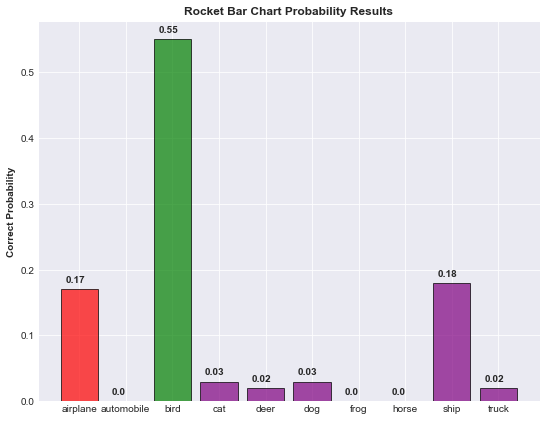

In [40]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
rocket_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
rocket_pro = [0.17, 0.00, 0.55, 0.03, 0.02, 0.03, 0.00, 0.00, 0.18, 0.02]

rocket_largest = np.max(np.array(rocket_pro))
rocket_smallest = np.min(np.array(rocket_pro))
print(rocket_largest, rocket_smallest)

rocket_color = ["red", "purple", "green", "purple", "purple", "purple", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(rocket_label)), rocket_pro, align = "center", color = rocket_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(rocket_label)), rocket_label)

for element, v in enumerate(rocket_pro):
    plt.text(np.arange(len(rocket_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Rocket Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 1 -> pickup truck

In [41]:
pickup_truck.head(10)

airplane      0.10
automobile    0.48
bird          0.05
cat           0.00
deer          0.01
dog           0.01
frog          0.01
horse         0.01
ship          0.08
truck         0.25
Name: pickup truck, dtype: float64

0.48 0.0


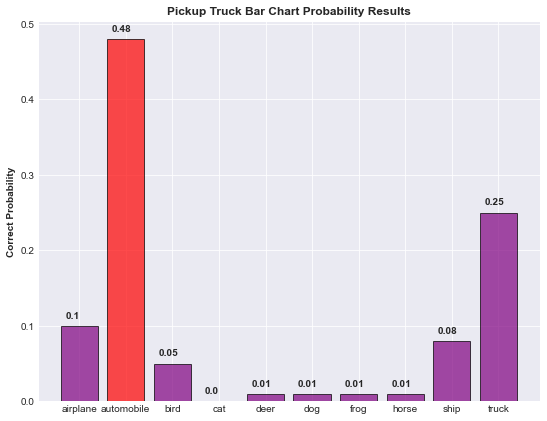

In [42]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
pickup_truck_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
pickup_truck_pro = [0.10, 0.48, 0.05, 0.00, 0.01, 0.01, 0.01, 0.01, 0.08, 0.25]

pickup_truck_largest = np.max(np.array(pickup_truck_pro))
pickup_truck_smallest = np.min(np.array(pickup_truck_pro))
print(pickup_truck_largest, pickup_truck_smallest)

pickup_truck_color = ["purple", "red", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(pickup_truck_label)), pickup_truck_pro, align = "center", color = pickup_truck_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(pickup_truck_label)), pickup_truck_label)

for element, v in enumerate(pickup_truck_pro):
    plt.text(np.arange(len(pickup_truck_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Pickup Truck Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 2 -> butterfly

In [43]:
butterfly.head(10)

airplane      0.03
automobile    0.02
bird          0.23
cat           0.11
deer          0.15
dog           0.14
frog          0.22
horse         0.04
ship          0.02
truck         0.04
Name: butterfly, dtype: float64

0.23 0.02


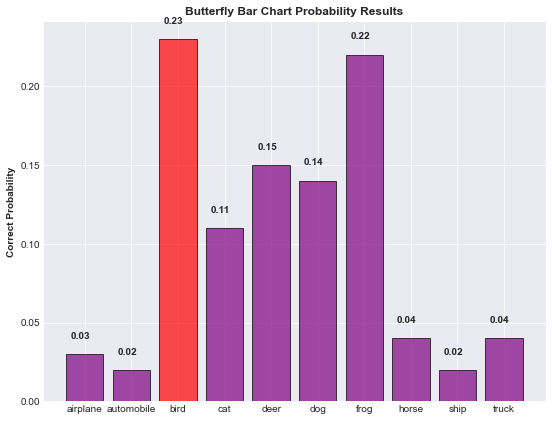

In [44]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
butterfly_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
butterfly_pro = [0.03, 0.02, 0.23, 0.11, 0.15, 0.14, 0.22, 0.04, 0.02, 0.04]

butterfly_largest = np.max(np.array(butterfly_pro))
butterfly_smallest = np.min(np.array(butterfly_pro))
print(butterfly_largest, butterfly_smallest)

butterfly_color = ["purple", "purple", "red", "purple", "purple", "purple", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(butterfly_label)), butterfly_pro, align = "center", color = butterfly_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(butterfly_label)), butterfly_label)

for element, v in enumerate(butterfly_pro):
    plt.text(np.arange(len(butterfly_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Butterfly Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 3 -> leopard

In [45]:
leopard.head(10)

airplane      0.01
automobile    0.00
bird          0.06
cat           0.28
deer          0.09
dog           0.05
frog          0.46
horse         0.00
ship          0.01
truck         0.04
Name: leopard, dtype: float64

0.46 0.0


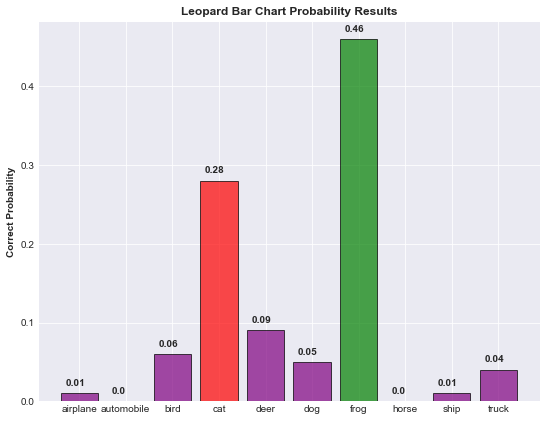

In [46]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
leopard_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
leopard_pro = [0.01, 0.00, 0.06, 0.28, 0.09, 0.05, 0.46, 0.00, 0.01, 0.04]

leopard_largest = np.max(np.array(leopard_pro))
leopard_smallest = np.min(np.array(leopard_pro))
print(leopard_largest, leopard_smallest)

leopard_color = ["purple", "purple", "purple", "red", "purple", "purple", "green", "purple", "purple", "purple"]

plt.bar(np.arange(len(leopard_label)), leopard_pro, align = "center", color = leopard_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(leopard_label)), leopard_label)

for element, v in enumerate(leopard_pro):
    plt.text(np.arange(len(leopard_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Leopard Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 4 -> cattle

In [47]:
cattle.head(10)

airplane      0.04
automobile    0.01
bird          0.08
cat           0.07
deer          0.18
dog           0.15
frog          0.00
horse         0.44
ship          0.00
truck         0.03
Name: cattle, dtype: float64

0.44 0.0


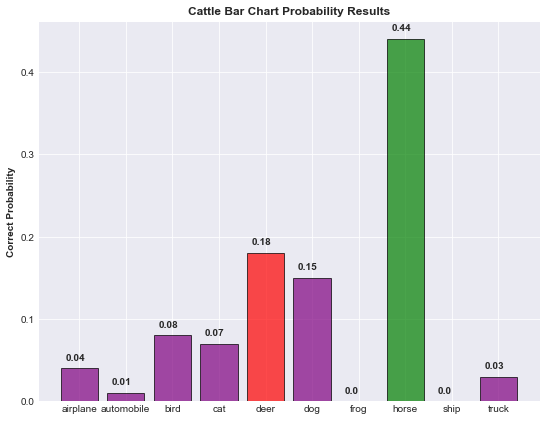

In [48]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
cattle_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
cattle_pro = [0.04, 0.01, 0.08, 0.07, 0.18, 0.15, 0.00, 0.44, 0.00, 0.03]

cattle_largest = np.max(np.array(cattle_pro))
cattle_smallest = np.min(np.array(cattle_pro))
print(cattle_largest, cattle_smallest)

cattle_color = ["purple", "purple", "purple", "purple", "red", "purple", "purple", "green", "purple", "purple"]

plt.bar(np.arange(len(cattle_label)), cattle_pro, align = "center", color = cattle_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(cattle_label)), cattle_label)

for element, v in enumerate(cattle_pro):
    plt.text(np.arange(len(cattle_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Cattle Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 5 -> wolf

In [49]:
wolf.head(10)

airplane      0.00
automobile    0.04
bird          0.14
cat           0.24
deer          0.06
dog           0.34
frog          0.13
horse         0.02
ship          0.02
truck         0.01
Name: wolf, dtype: float64

0.34 0.0


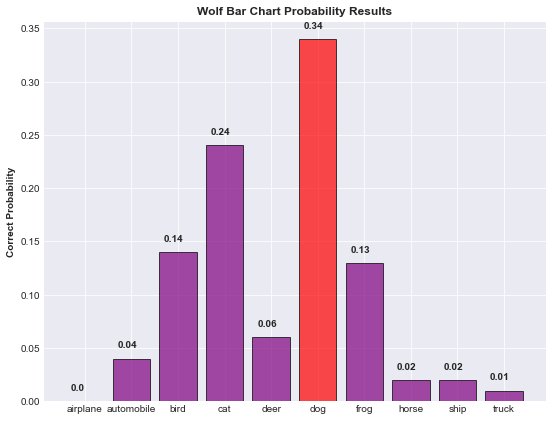

In [50]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
wolf_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
wolf_pro = [0.00, 0.04, 0.14, 0.24, 0.06, 0.34, 0.13, 0.02, 0.02, 0.01]

wolf_largest = np.max(np.array(wolf_pro))
wolf_smallest = np.min(np.array(wolf_pro))
print(wolf_largest, wolf_smallest)

wolf_color = ["purple", "purple", "purple", "purple", "purple", "red", "purple", "purple", "purple", "purple"]

plt.bar(np.arange(len(wolf_label)), wolf_pro, align = "center", color = wolf_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(wolf_label)), wolf_label)

for element, v in enumerate(wolf_pro):
    plt.text(np.arange(len(wolf_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Wolf Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 6 -> lizard

In [51]:
lizard.head(10)

airplane      0.08
automobile    0.01
bird          0.17
cat           0.17
deer          0.10
dog           0.09
frog          0.28
horse         0.02
ship          0.03
truck         0.05
Name: lizard, dtype: float64

0.28 0.01


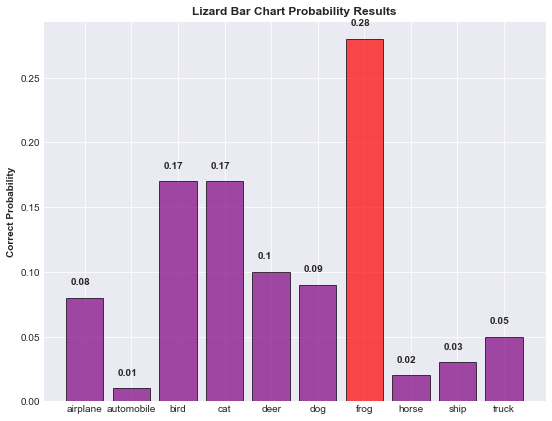

In [52]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
lizard_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
lizard_pro = [0.08, 0.01, 0.17, 0.17, 0.10, 0.09, 0.28, 0.02, 0.03, 0.05]

lizard_largest = np.max(np.array(lizard_pro))
lizard_smallest = np.min(np.array(lizard_pro))
print(lizard_largest, lizard_smallest)

lizard_color = ["purple", "purple", "purple", "purple", "purple", "purple", "red", "purple", "purple", "purple"]

plt.bar(np.arange(len(lizard_label)), lizard_pro, align = "center", color = lizard_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(lizard_label)), lizard_label)

for element, v in enumerate(lizard_pro):
    plt.text(np.arange(len(lizard_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Lizard Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 7 -> camel

In [53]:
camel.head(10)

airplane      0.03
automobile    0.00
bird          0.15
cat           0.11
deer          0.13
dog           0.22
frog          0.04
horse         0.24
ship          0.02
truck         0.06
Name: camel, dtype: float64

0.24 0.0


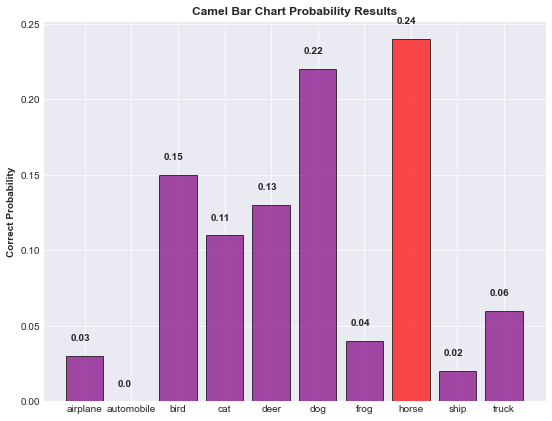

In [54]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
camel_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
camel_pro = [0.03, 0.00, 0.15, 0.11, 0.13, 0.22, 0.04, 0.24, 0.02, 0.06]

camel_largest = np.max(np.array(camel_pro))
camel_smallest = np.min(np.array(camel_pro))
print(camel_largest, camel_smallest)

camel_color = ["purple", "purple", "purple", "purple", "purple", "purple", "purple", "red", "purple", "purple"]

plt.bar(np.arange(len(camel_label)), camel_pro, align = "center", color = camel_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(camel_label)), camel_label)

for element, v in enumerate(camel_pro):
    plt.text(np.arange(len(camel_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Camel Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 8 -> tank

In [55]:
tank.head(10)

airplane      0.17
automobile    0.08
bird          0.07
cat           0.07
deer          0.03
dog           0.01
frog          0.09
horse         0.02
ship          0.24
truck         0.22
Name: tank, dtype: float64

0.24 0.01


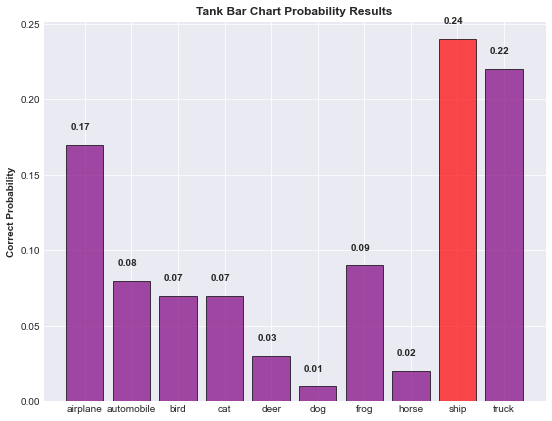

In [56]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
tank_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
tank_pro = [0.17, 0.08, 0.07, 0.07, 0.03, 0.01, 0.09, 0.02, 0.24, 0.22]

tank_largest = np.max(np.array(tank_pro))
tank_smallest = np.min(np.array(tank_pro))
print(tank_largest, tank_smallest)

tank_color = ["purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "red", "purple"]

plt.bar(np.arange(len(tank_label)), tank_pro, align = "center", color = tank_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(tank_label)), tank_label)

for element, v in enumerate(tank_pro):
    plt.text(np.arange(len(tank_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Tank Bar Chart Probability Results", fontweight = "bold")
plt.show()

### Label 9 -> bus

In [57]:
bus.head(10)

airplane      0.07
automobile    0.25
bird          0.00
cat           0.04
deer          0.00
dog           0.01
frog          0.01
horse         0.04
ship          0.13
truck         0.45
Name: bus, dtype: float64

0.45 0.0


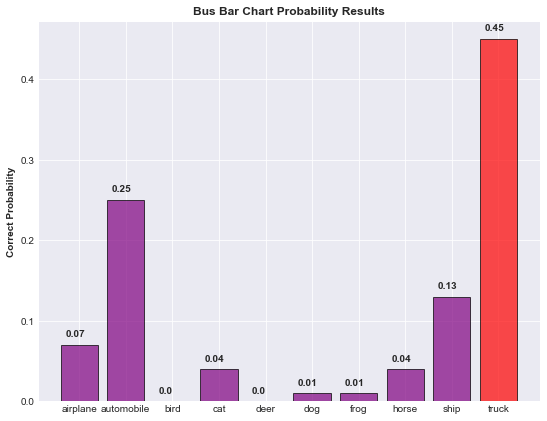

In [58]:
sns.axes_style()
sns.set_style("darkgrid")
plt.figure(figsize = (9, 7))
bus_label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
bus_pro = [0.07, 0.25, 0.00, 0.04, 0.00, 0.01, 0.01, 0.04, 0.13, 0.45]

bus_largest = np.max(np.array(bus_pro))
bus_smallest = np.min(np.array(bus_pro))
print(bus_largest, bus_smallest)

bus_color = ["purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "purple", "red"]

plt.bar(np.arange(len(bus_label)), bus_pro, align = "center", color = bus_color, edgecolor = "black", alpha = 0.7)
# Define the name of the x-axis
plt.xticks(np.arange(len(bus_label)), bus_label)

for element, v in enumerate(bus_pro):
    plt.text(np.arange(len(bus_label))[element] - 0.3, v + 0.01, str(v), fontweight = "bold")
    
plt.ylabel("Correct Probability", fontweight = "bold")
plt.title("Bus Bar Chart Probability Results", fontweight = "bold")
plt.show()

### CIFAR10 -> Show the Misclassified Images 

In [63]:
misclassified_CIFAR10_results = np.load("Curriculum_CIFAR10_Misclassified_Images.npz", allow_pickle = True)

In [64]:
misclassified_CIFAR10_results["C_CIFAR10M"] 

array([[0.99755055, 0.9954789 , 0.9861981 ],
       [0.981818  , 0.977465  , 0.9670719 ],
       [0.98781765, 0.9849856 , 0.96818423],
       [0.9834249 , 0.97810334, 0.9678801 ],
       [0.9857426 , 0.9847981 , 0.9802836 ],
       [0.94769037, 0.9440975 , 0.92342895],
       [0.8863351 , 0.86205125, 0.8250839 ],
       [0.9968279 , 0.98241407, 0.92022306],
       [0.99717647, 0.9894913 , 0.9853171 ],
       [0.99753   , 0.99748504, 0.9969596 ]], dtype=float32)

In [65]:
misclassified_CIFAR10_results["C_CIFAR10R"]

array([[[1.85437049e-04, 9.97735977e-01, 1.69682221e-06, 2.48092135e-07,
         5.33050638e-07, 7.82342298e-08, 1.12724472e-07, 1.46799684e-08,
         6.36453740e-04, 1.43950933e-03],
        [1.17125432e-03, 9.96650159e-01, 1.82440763e-05, 1.02476758e-06,
         1.03701386e-05, 5.79306857e-07, 8.93654544e-07, 4.53026360e-07,
         6.10016403e-04, 1.53677573e-03],
        [1.63743971e-03, 4.01763339e-03, 3.27153160e-04, 4.86682460e-04,
         2.50754732e-04, 3.94296832e-04, 6.26877300e-05, 1.67046243e-03,
         3.31755844e-03, 9.87835586e-01]],

       [[5.79999833e-05, 8.86434130e-03, 8.37739208e-06, 6.48326240e-05,
         6.28668522e-06, 3.81998470e-05, 1.00118159e-05, 8.60567015e-05,
         1.81510186e-04, 9.90682364e-01],
        [2.48197466e-06, 2.97246757e-03, 3.91396825e-05, 2.23594066e-03,
         4.72970045e-04, 2.14116881e-03, 1.60355272e-03, 1.00852177e-02,
         9.58532746e-06, 9.80437458e-01],
        [9.67085838e-01, 1.39324829e-05, 5.54472441e-03, 1

In [66]:
CIFAR10_first = np.array([x[0] for x in misclassified_CIFAR10_results["C_CIFAR10R"]])
CIFAR10_second = np.array([x[1] for x in misclassified_CIFAR10_results["C_CIFAR10R"]])
CIFAR10_third = np.array([x[2] for x in misclassified_CIFAR10_results["C_CIFAR10R"]])

img_CIFAR10_first = np.array([x[0] for x in misclassified_CIFAR10_results["C_CIFAR10I"]])
img_CIFAR10_second = np.array([x[1] for x in misclassified_CIFAR10_results["C_CIFAR10I"]])
img_CIFAR10_third = np.array([x[2] for x in misclassified_CIFAR10_results["C_CIFAR10I"]])

print(CIFAR10_first)
print(CIFAR10_second)
print(CIFAR10_third)

[[1.85437049e-04 9.97735977e-01 1.69682221e-06 2.48092135e-07
  5.33050638e-07 7.82342298e-08 1.12724472e-07 1.46799684e-08
  6.36453740e-04 1.43950933e-03]
 [5.79999833e-05 8.86434130e-03 8.37739208e-06 6.48326240e-05
  6.28668522e-06 3.81998470e-05 1.00118159e-05 8.60567015e-05
  1.81510186e-04 9.90682364e-01]
 [9.93863463e-01 1.04692191e-07 6.04581879e-03 1.32978766e-06
  7.73428983e-05 3.53864789e-06 1.67884444e-08 6.14068953e-19
  8.40940720e-06 2.82784596e-09]
 [4.15485971e-07 1.75469067e-05 2.65617529e-03 5.15773613e-03
  3.55563522e-03 2.10270900e-05 9.88582611e-01 8.49832531e-07
  6.46699482e-06 1.56305293e-06]
 [7.05058937e-07 3.06932197e-05 2.15582177e-03 7.35886628e-04
  5.66112809e-03 4.87320403e-06 9.91403759e-01 4.43393674e-07
  5.18008346e-06 1.54025452e-06]
 [3.17791826e-03 2.27346900e-03 3.40736751e-03 2.99900654e-03
  4.16590506e-03 7.82199576e-03 8.40068460e-05 9.55512345e-01
  3.72430426e-04 2.01855488e-02]
 [8.72892886e-02 1.10290282e-04 1.61237065e-02 6.96591567e

In [67]:
CIFAR10_transpose = np.vstack([CIFAR10_first, CIFAR10_second, CIFAR10_third]).reshape((3, 10, 10))

img_reshape = np.vstack([img_CIFAR10_first, img_CIFAR10_second, img_CIFAR10_third]).reshape(3, 10, 3, 32, 32)


img_CIFAR10_transpose = img_reshape.transpose((0, 1, 3, 4, 2))

# print(CIFAR10_transpose)
print(len(CIFAR10_transpose))
print(len(CIFAR10_transpose[0]))

3
10


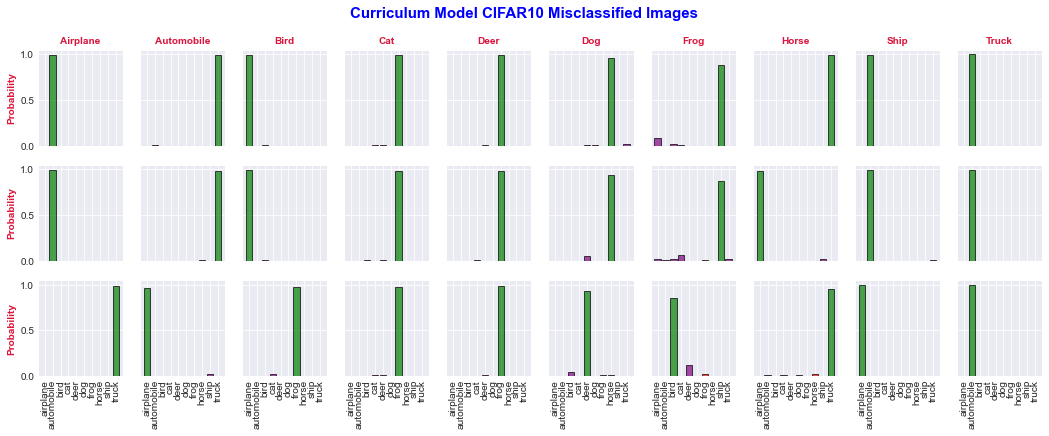

In [69]:
sns.axes_style()
sns.set_style("darkgrid")

label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
chart_label = ("Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck")

x = np.arange(len(label))

# Define the 10 * 3 subplot
fig , axs = plt.subplots(3, 10, sharex = True, sharey = True, figsize = (18, 6))
fig.suptitle("Curriculum Model CIFAR10 Misclassified Images", fontsize = 15, color = "blue", fontweight = "bold")

    
for m in range(len(CIFAR10_transpose)):
    # Share the x-axis
    axs[m, 0].set_ylabel("Probability", color = "crimson", fontsize = 10, fontweight = "bold")
    
    for n in range(len(CIFAR10_transpose[0])):
        
        # largest value -> green
        # current label -> red
        # other -> purple
        color = []
        
        for pro_value in CIFAR10_transpose[m][n]:
            if (pro_value < np.max(CIFAR10_transpose[m][n])):
                # when the index is equal to the current label
                if (CIFAR10_transpose[m][n].tolist().index(pro_value) == n):
                    color.append("red")
                else:
                    color.append("purple")
            # maximum probability
            else:
                color.append("green")
        
        # Define the name of each column
        if m == 0:
            axs[m, n].set_title("%s" % chart_label[n], color = "crimson", fontsize = 10, fontweight = "bold")
        axs[m, n].bar(x, CIFAR10_transpose[m][n], \
                align = "center", color = color, edgecolor = "black", alpha = 0.7)
        
        if m == 2:
            # show the label name
            axs[m, n].set_xticks(x)
            axs[m, n].set_xticklabels(label, rotation = 90)
            # plt.xticks(x, label, rotation = 90)

plt.savefig("Curriculum_Model_CIFAR10_Misclassified_Images.png")
plt.show()    

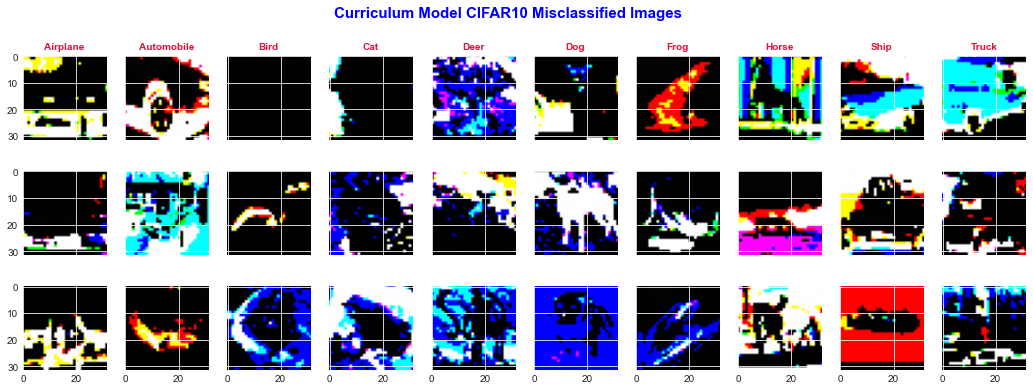

In [90]:
sns.axes_style()
sns.set_style("darkgrid")

label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
chart_label = ("Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck")

x = np.arange(len(label))

# Define the 10 * 3 subplot
fig , axs = plt.subplots(3, 10, sharex = True, sharey = True, figsize = (18, 6))
fig.suptitle("Curriculum Model CIFAR10 Misclassified Images", fontsize = 15, color = "blue", fontweight = "bold")

    
for m in range(len(img_CIFAR10_transpose)):
    # Share the x-axis
    # axs[m, 0].set_ylabel("Probability", color = "crimson", fontsize = 10, fontweight = "bold")
    
    for n in range(len(img_CIFAR10_transpose[0])):
        axs[m, n].imshow(img_CIFAR10_transpose[m][n].astype("uint8"))
        
        # Define the name of each column
        if m == 0:
            axs[m, n].set_title("%s" % chart_label[n], color = "crimson", fontsize = 10, fontweight = "bold")

plt.savefig("Curriculum_Model_CIFAR10_Misclassified_Images_Original.png")
plt.show()    

### CIFAR100 -> Show the Misclassified Images 

In [75]:
misclassified_CIFAR100_results = np.load("Curriculum_CIFAR100_Misclassified_Images.npz", allow_pickle = True)

In [76]:
misclassified_CIFAR100_results["C_CIFAR100M"] 

array([[0.9312557 , 0.9106355 , 0.86893564],
       [0.99303985, 0.98525065, 0.9625177 ],
       [0.9987703 , 0.98760915, 0.9804793 ],
       [0.9995197 , 0.99432516, 0.9898896 ],
       [0.99531734, 0.99198633, 0.99176776],
       [0.9263774 , 0.92486364, 0.91367286],
       [0.940555  , 0.9219221 , 0.81088156],
       [0.92739385, 0.8241171 , 0.7928303 ],
       [0.9817152 , 0.9713353 , 0.96093506],
       [0.9806766 , 0.9729958 , 0.94850546]], dtype=float32)

In [77]:
misclassified_CIFAR100_results["C_CIFAR100R"]

array([[[3.36941294e-02, 1.66610582e-04, 7.94087071e-04, 8.21930298e-05,
         3.91973663e-06, 3.08212248e-06, 1.33212711e-06, 3.56937271e-08,
         9.64949846e-01, 3.04662419e-04],
        [5.45535423e-03, 2.69587281e-06, 9.16090846e-01, 6.21677842e-03,
         6.03725128e-02, 8.79827142e-03, 2.64147972e-03, 2.57583833e-05,
         3.87330365e-04, 8.99024508e-06],
        [9.47405305e-03, 1.86751407e-04, 8.78409684e-01, 1.20478310e-02,
         4.23227437e-02, 1.81811641e-03, 4.86145094e-02, 6.46823628e-06,
         7.01559242e-03, 1.04200466e-04]],

       [[5.97156068e-05, 2.70692538e-03, 2.98489631e-05, 5.35650586e-04,
         2.33234750e-05, 1.13108581e-04, 9.68173190e-05, 1.88984559e-04,
         4.98857407e-04, 9.95746791e-01],
        [1.02034232e-06, 7.33035523e-03, 5.90647119e-07, 1.09328048e-05,
         3.71433271e-06, 1.73255248e-05, 5.25880068e-06, 4.72922547e-05,
         2.67411679e-06, 9.92581010e-01],
        [1.16001895e-04, 7.16659566e-03, 2.68314529e-04, 1

In [78]:
CIFAR100_first = np.array([x[0] for x in misclassified_CIFAR100_results["C_CIFAR100R"]])
CIFAR100_second = np.array([x[1] for x in misclassified_CIFAR100_results["C_CIFAR100R"]])
CIFAR100_third = np.array([x[2] for x in misclassified_CIFAR100_results["C_CIFAR100R"]])

img_CIFAR100_first = np.array([x[0] for x in misclassified_CIFAR100_results["C_CIFAR100I"]])
img_CIFAR100_second = np.array([x[1] for x in misclassified_CIFAR100_results["C_CIFAR100I"]])
img_CIFAR100_third = np.array([x[2] for x in misclassified_CIFAR100_results["C_CIFAR100I"]])

print(CIFAR100_first)
print(CIFAR100_second)
print(CIFAR100_third)

[[3.3694129e-02 1.6661058e-04 7.9408707e-04 8.2193030e-05 3.9197366e-06
  3.0821225e-06 1.3321271e-06 3.5693727e-08 9.6494985e-01 3.0466242e-04]
 [5.9715607e-05 2.7069254e-03 2.9848963e-05 5.3565059e-04 2.3323475e-05
  1.1310858e-04 9.6817319e-05 1.8898456e-04 4.9885741e-04 9.9574679e-01]
 [5.3400534e-08 1.4433197e-05 2.0806323e-04 3.0183711e-04 4.9416238e-04
  4.3738416e-07 9.9897838e-01 3.2803559e-08 1.0631178e-06 1.6116626e-06]
 [9.9951971e-01 2.3439166e-09 4.7905935e-04 1.4594413e-08 1.0039780e-06
  6.6886599e-08 3.3955828e-11 9.6111750e-26 1.0640423e-07 8.4826529e-12]
 [3.6788933e-06 4.6886275e-06 8.7445740e-05 4.2409498e-05 2.1166028e-03
  2.8660570e-04 8.4191752e-06 9.9743396e-01 2.0412017e-08 1.6227721e-05]
 [1.9724081e-05 9.7891539e-03 4.6025044e-03 2.8965866e-02 1.2968608e-02
  1.1046748e-03 9.2748207e-01 5.6638335e-05 4.1576650e-04 1.4594952e-02]
 [9.4068968e-01 1.2059034e-04 3.9463297e-02 3.2916486e-03 5.2050408e-03
  2.6044757e-03 1.3472045e-04 3.8058070e-07 8.4038526e-03 

In [79]:
CIFAR100_transpose = np.vstack([CIFAR100_first, CIFAR100_second, CIFAR100_third]).reshape((3, 10, 10))

img_reshape_100 = np.vstack([img_CIFAR100_first, img_CIFAR100_second, img_CIFAR100_third]).reshape(3, 10, 3, 32, 32)

img_CIFAR100_transpose = img_reshape_100.transpose((0, 1, 3, 4, 2))

# print(CIFAR10_transpose)
print(len(CIFAR100_transpose))
print(len(CIFAR100_transpose[0]))

3
10


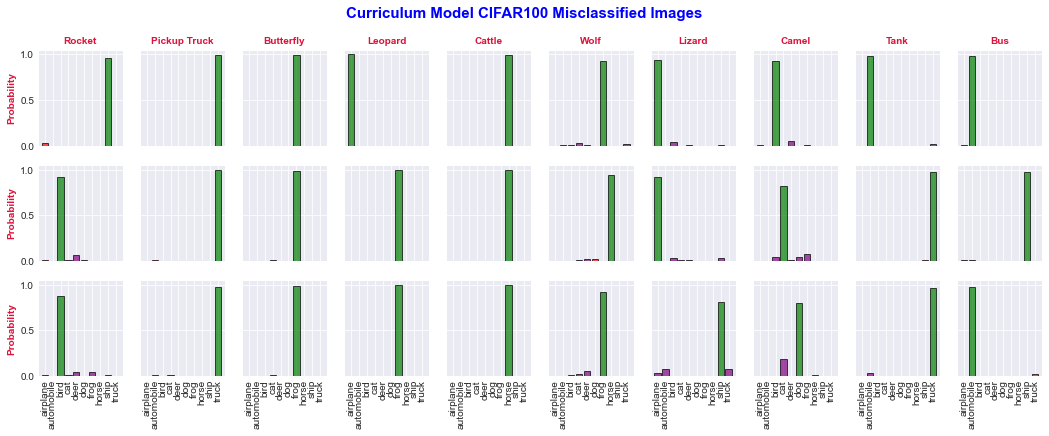

In [80]:
sns.axes_style()
sns.set_style("darkgrid")

label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
chart_label = ("Rocket", "Pickup Truck", "Butterfly", "Leopard", "Cattle", "Wolf", "Lizard", "Camel", "Tank", "Bus")

x = np.arange(len(label))

# Define the 10 * 3 subplot
fig , axs = plt.subplots(3, 10, sharex = True, sharey = True, figsize = (18, 6))
fig.suptitle("Curriculum Model CIFAR100 Misclassified Images", fontsize = 15, color = "blue", fontweight = "bold")

    
for m in range(len(CIFAR100_transpose)):
    # Share the x-axis
    axs[m, 0].set_ylabel("Probability", color = "crimson", fontsize = 10, fontweight = "bold")
    
    for n in range(len(CIFAR100_transpose[0])):
        
        # largest value -> green
        # current label -> red
        # other -> purple
        color = []
        
        for pro_value in CIFAR100_transpose[m][n]:
            if (pro_value < np.max(CIFAR100_transpose[m][n])):
                # when the index is equal to the current label
                if (CIFAR100_transpose[m][n].tolist().index(pro_value) == n):
                    color.append("red")
                else:
                    color.append("purple")
            # maximum probability
            else:
                color.append("green")
        
        # Define the name of each column
        if m == 0:
            axs[m, n].set_title("%s" % chart_label[n], color = "crimson", fontsize = 10, fontweight = "bold")
        axs[m, n].bar(x, CIFAR100_transpose[m][n], \
                align = "center", color = color, edgecolor = "black", alpha = 0.7)
        
        if m == 2:
            # show the label name
            axs[m, n].set_xticks(x)
            axs[m, n].set_xticklabels(label, rotation = 90)
            # plt.xticks(x, label, rotation = 90)

plt.savefig("Curriculum_Model_CIFAR100_Misclassified_Images.png")
plt.show()    

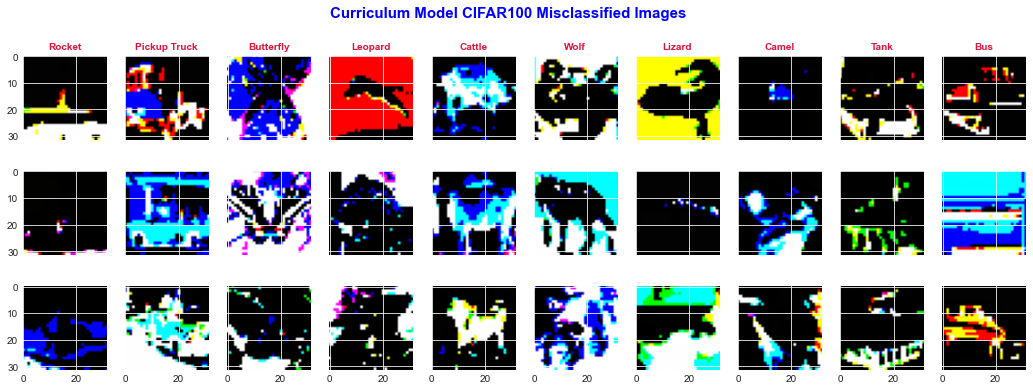

In [89]:
sns.axes_style()
sns.set_style("darkgrid")

label = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
chart_label = ("Rocket", "Pickup Truck", "Butterfly", "Leopard", "Cattle", "Wolf", "Lizard", "Camel", "Tank", "Bus")

x = np.arange(len(label))

# Define the 10 * 3 subplot
fig , axs = plt.subplots(3, 10, sharex = True, sharey = True, figsize = (18, 6))
fig.suptitle("Curriculum Model CIFAR100 Misclassified Images", fontsize = 15, color = "blue", fontweight = "bold")

    
for m in range(len(img_CIFAR100_transpose)):
    # Share the x-axis
    # axs[m, 0].set_ylabel("Probability", color = "crimson", fontsize = 10, fontweight = "bold")
    
    for n in range(len(img_CIFAR100_transpose[0])):
        axs[m, n].imshow(img_CIFAR100_transpose[m][n].astype("uint8"))
        
        # Define the name of each column
        if m == 0:
            axs[m, n].set_title("%s" % chart_label[n], color = "crimson", fontsize = 10, fontweight = "bold")

plt.savefig("Curriculum_Model_CIFAR100_Misclassified_Images_Original.png")
plt.show()